In [14]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors


In [17]:
from itertools import cycle
from sklearn.cluster import Birch

## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False


In [18]:
from sklearn.cluster import DBSCAN

In [46]:
data01 = pd.read_csv("../../Marchine_Learning/protein/data_3.csv")
data01.head()

,No,SingalP,Phobius,NetOGlyc,NetNGlyc,TatP,Length,PI,[G1.1.1.1],[G1.1.1.2],...,[G7.1.1.75],[G7.1.1.76],[G7.1.1.77],[G7.1.1.78],[G7.1.1.79],[G7.1.1.80],[G9.1],[G9.2],[G9.3],cluster_db
0,-1.737595,2.334219,-0.404720,-0.614566,-0.800480,-0.546875,-0.938667,0.992002,0.868073,0.448921,...,-1.393280,0.087572,-1.865276,-3.824025,0.065250,-0.281345,-0.940237,-0.950737,-0.931792,-1
1,-1.737425,-0.488804,-0.404720,-0.211189,-0.074902,-0.704138,-0.293968,-1.093401,1.577258,-0.446343,...,0.045382,-0.029274,-1.225669,-1.073136,0.258354,0.340301,-0.274072,-0.339915,-0.385440,-1
2,-1.737084,-0.487390,-0.017117,0.797255,1.013465,1.365119,0.969116,-0.664893,0.000253,-0.014770,...,-0.134779,-0.004745,-0.638753,-0.632191,-0.075457,-0.144411,0.988528,1.068716,1.140932,-1
3,-1.736913,-0.473809,-0.404720,-0.049838,-0.074902,-0.381334,-0.035212,0.546354,-0.697447,0.167620,...,0.343097,0.797566,1.155802,0.703235,-1.645015,-0.737409,-0.022118,0.069215,-0.038723,-1
4,-1.736743,-0.487390,-0.404720,1.079619,-0.437691,1.141639,0.006453,-0.642039,0.111086,-0.610190,...,2.037881,1.169287,1.770130,0.420263,1.294522,0.630498,-0.009464,-0.209652,-0.197999,-1


In [47]:
data01.shape

(19655, 1596)

In [48]:
data01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19655 entries, 0 to 19654
Columns: 1596 entries, No to cluster_db
dtypes: float64(1595), int64(1)
memory usage: 239.3 MB


In [49]:
pd.isnull(data01).values.any()

False

In [50]:
from sklearn.decomposition import PCA

In [66]:
pca = PCA(n_components=2, svd_solver='randomized')  # 输出4维 PCA主成分分析抽象出维度


newdata01 = pca.fit_transform(data01) # 载入N维
newdata01[:4]

array([[20.01621406,  0.31355929],
       [-3.29645309, -4.83301661],
       [-9.73200364,  4.81707847],
       [-3.59666031,  2.97008058]])

In [67]:
X01 = pd.DataFrame(newdata01)

In [68]:
dbscan01 = DBSCAN(eps = 1,min_samples = 5)
dbscan01.fit(X01)

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [69]:
labels = dbscan01.labels_
X01['cluster_db'] = labels
X01.sort_values('cluster_db').tail()

,0,1,cluster_db
9400,33.076821,-8.249544,44
18395,34.270650,-7.572692,44
18358,33.799340,-7.633761,44
18590,34.649795,-7.955609,44
7513,33.630466,-8.118631,44


In [70]:
# 离群点有761个，由此可见，在增大半径的同时离群点的个数在减小，因此进一步增大半径
X01['cluster_db'].value_counts()

 0     18448
-1       761
 7        64
 16       21
 5        21
 3        18
 6        15
 1        15
 42       14
 17       14
 10       12
 21       12
 29       12
 15       11
 32       10
 37       10
 8         9
 4         9
 33        8
 35        8
 20        8
 36        8
 22        8
 23        8
 27        8
 9         8
 25        8
 19        7
 13        7
 2         7
 34        7
 30        6
 38        6
 39        6
 41        6
 24        6
 11        5
 12        5
 26        5
 18        5
 28        5
 44        5
 40        5
 14        5
 31        5
 43        4
Name: cluster_db, dtype: int64

In [71]:
labels_true = X01['cluster_db']
labels_true = labels_true.values
labels_true

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [72]:
X01 = X01.values

In [73]:
xy = xy.values

Estimated number of clusters: 45
Estimated number of noise points: 761
Silhouette Coefficient(轮廓系数): 0.045


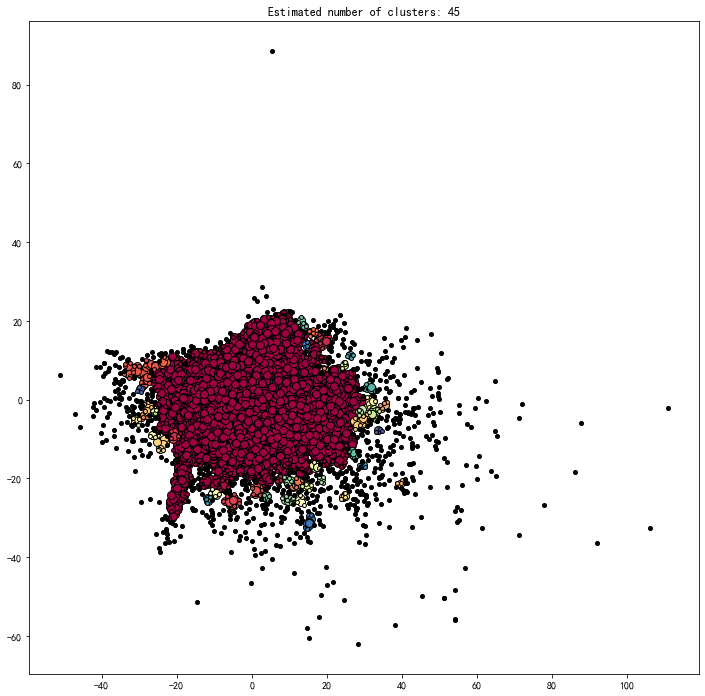

In [76]:
from sklearn import metrics

core_samples_mask = np.zeros_like(dbscan01.labels_, dtype=bool)
core_samples_mask[dbscan01.core_sample_indices_] = True
labels = dbscan01.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# # 定义fig ,画布用函数 plt.figure(),并指定画布的大小:figsize = (8,6)
fig = plt.figure(figsize = (12,12))

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient(轮廓系数): %0.3f" % metrics.silhouette_score(X01, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X01[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

    xy = X01[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], '.', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# 第二次聚类分析：减小半径

In [79]:
X02 = pd.DataFrame(newdata01)

In [80]:
dbscan02 = DBSCAN(eps = 0.5,min_samples = 5)
dbscan02.fit(X02)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [81]:
labels = dbscan02.labels_
X02['cluster_db'] = labels
X02.sort_values('cluster_db').tail()

,0,1,cluster_db
6926,-20.814186,0.064997,125
2856,-20.424728,-0.468634,125
4854,18.409773,-4.712170,126
19546,18.779370,-4.377349,126
2962,18.484648,-4.510175,126


In [82]:
# 离群点有761个，由此可见，在增大半径的同时离群点的个数在减小，因此进一步增大半径
X02['cluster_db'].value_counts()

 1      15387
-1       2501
 0        307
 6         81
 22        57
 16        55
 44        46
 27        44
 26        43
 30        42
 31        40
 37        30
 39        27
 17        26
 60        25
 70        25
 41        24
 4         23
 69        23
 12        21
 55        19
 24        19
 9         18
 73        17
 34        17
 49        17
 32        17
 11        16
 112       15
 57        14
        ...  
 76         5
 123        5
 91         5
 43         5
 122        5
 106        5
 90         5
 10         5
 105        5
 89         5
 120        5
 8          5
 95         5
 87         5
 118        5
 65         5
 111        4
 97         4
 99         4
 85         4
 86         4
 121        4
 59         4
 77         4
 94         4
 119        4
 124        3
 126        3
 100        2
 115        1
Name: cluster_db, Length: 128, dtype: int64

In [83]:
labels_true = X02['cluster_db']
labels_true = labels_true.values
labels_true

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [84]:
X02 = X02.values

Estimated number of clusters: 127
Estimated number of noise points: 2501
Silhouette Coefficient(轮廓系数): 0.019


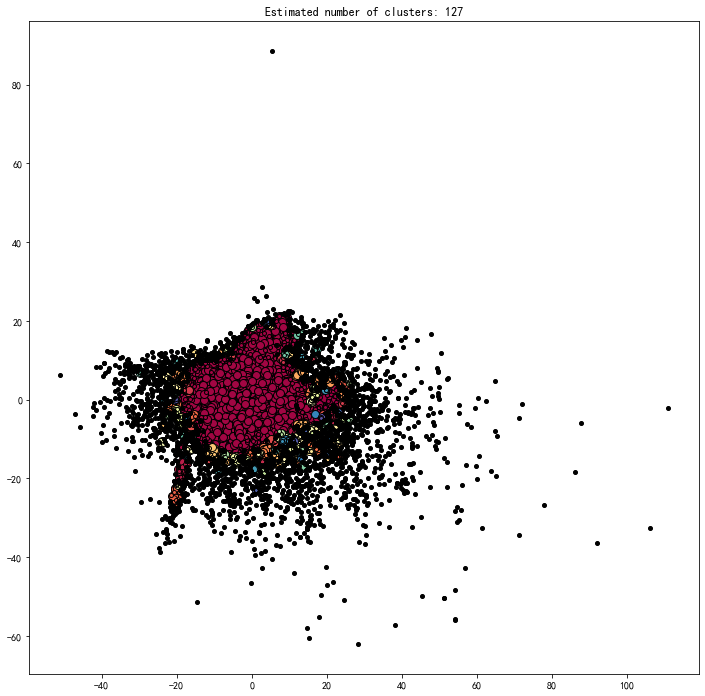

In [86]:
from sklearn import metrics

core_samples_mask = np.zeros_like(dbscan02.labels_, dtype=bool)
core_samples_mask[dbscan02.core_sample_indices_] = True
labels = dbscan02.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# # 定义fig ,画布用函数 plt.figure(),并指定画布的大小:figsize = (8,6)
fig = plt.figure(figsize = (12,12))

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient(轮廓系数): %0.3f" % metrics.silhouette_score(X02, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X02[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

    xy = X02[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], '.', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# 第三次聚类分析

In [87]:
X03 = pd.DataFrame(newdata01)

In [88]:
dbscan03 = DBSCAN(eps = 1.5,min_samples = 5)
dbscan03.fit(X03)

DBSCAN(algorithm='auto', eps=1.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [89]:
labels = dbscan03.labels_
X03['cluster_db'] = labels
X03.sort_values('cluster_db').tail()

,0,1,cluster_db
18792,29.227323,-23.268931,19
15695,30.473611,-24.197517,19
6795,28.944651,-23.894580,19
924,30.380289,-24.813075,19
17905,29.694449,-23.871043,19


In [ ]:
# 离群点有761个，由此可见，在增大半径的同时离群点的个数在减小，因此进一步增大半径
X03['cluster_db'].value_counts()

In [90]:
labels_true = X03['cluster_db']
labels_true = labels_true.values
labels_true

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [91]:
X03 = X03.values

Estimated number of clusters: 20
Estimated number of noise points: 369
Silhouette Coefficient(轮廓系数): 0.197


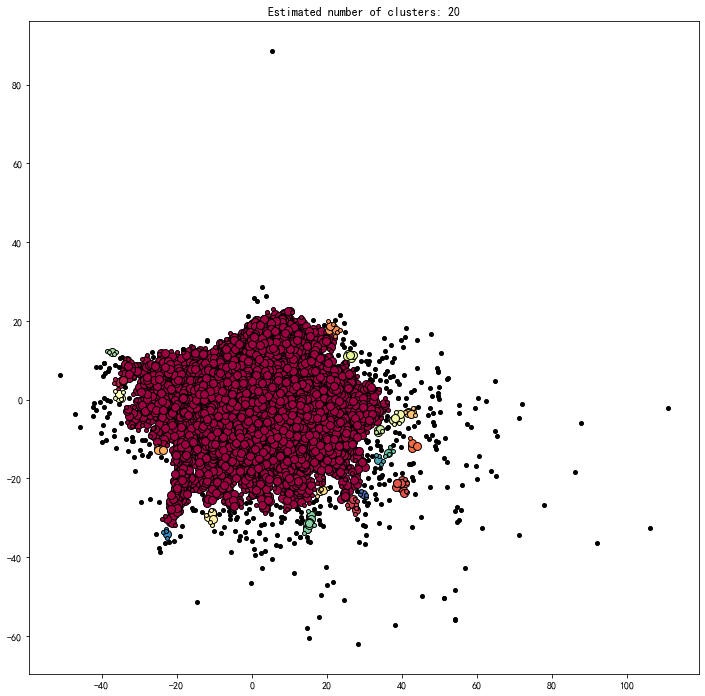

In [92]:
from sklearn import metrics

core_samples_mask = np.zeros_like(dbscan03.labels_, dtype=bool)
core_samples_mask[dbscan03.core_sample_indices_] = True
labels = dbscan03.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# # 定义fig ,画布用函数 plt.figure(),并指定画布的大小:figsize = (8,6)
fig = plt.figure(figsize = (12,12))

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient(轮廓系数): %0.3f" % metrics.silhouette_score(X03, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X03[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

    xy = X03[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], '.', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()